# Bushfire Analysis using Meteorological Data


Student information
- Family Name: Kavalipati
- Given Name: Ujwal
- email:kavalipatiujwal@gmail.com

Programming Language: R 4.0.0 in Jupyter Notebook

R Libraries used:
- ggplot2
- GGally
- Cowplot 
- gridExtra
- reshape2
- lattice
- car
- MLmetrics
- caret
- randomForest

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

<p>The current task which we are going to do is about bushfire analysis.The collected
data contains rich information about the status of the forest, the analysis of
which can help us detect potential bushfires so as to make effective and efficient
firefighting plan and then minimize the damage caused by the bushfires.We will be exploring machine learning approaches to predict the burned area of bushfires by using meteorological data that are
known to influence the wild fires.We will be identifying the key factors that are strongly associated with the response variable(burned area)</p> 

In [1]:
# Import the required libraries
library(ggplot2)
library(GGally)
library(gridExtra)
library(cowplot)
library(reshape2)
library(lattice)
library(car)
#install.packages('MLmetrics')
library(MLmetrics)
#install.packages('caret')
library(caret)
#install.packages('randomForest')
library(randomForest)


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: carData


Attaching package: 'MLmetrics'


The following object is masked from 'package:base':

    Recall



Attaching package: 'caret'


The following objects are masked from 'package:MLmetrics':

    MAE, RMSE


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:gridExtra':

    combine


The following object is masked from 'package:ggplot2':

    margin




In [2]:
#Read the files into the notebook

forest <- read.csv('forestfires.csv')

### Data Description
<p>The dataset contains 517 fire instances, each of which have 13 columns: the first
12 columns corresponding to the attributes (e.g., spatial coordinates, month,
day, four fire indices, and other meteorological data) and the last column containing the burned area</p>

<b><p>1.Spatial information</p></b>
<li>X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
<li>Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
    <b><p>2.Temporal information</p></b>
<li>month - month of the year: 'jan' to 'dec'
<li>day - day of the week: 'mon' to 'sun'
<li>FWI: The forest Fire Weather Index (FWI). Which is the Canadian system for rating fire danger.

<b><p>3.FFMC - FFMC index from the FWI system: 18.7 to 96.20</p></b>
<li>DMC - DMC index from the FWI system: 1.1 to 291.3
<li>DC - DC index from the FWI system: 7.9 to 860.6
<li>ISI - ISI index from the FWI system: 0.0 to 56.10
    <b><p>4.Methorological information</p></b>
<li>temp - temperature in Celsius degrees: 2.2 to 33.30
<li>RH - relative humidity in %: 15.0 to 100
<li>wind - wind speed in km/h: 0.40 to 9.40
<li>rain - outside rain in mm/m2 : 0.0 to 6.4
    <b><p>5.area - the burned area of the forest (in ha): 0.00 to 1090.84</b></p>

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In [3]:
# let's look at the dataset
head(forest)
dim(forest)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


[1] 517  13

In [4]:
# Let's find the descriptive statistics 
summary(forest)

       X               Y          month               day           
 Min.   :1.000   Min.   :2.0   Length:517         Length:517        
 1st Qu.:3.000   1st Qu.:4.0   Class :character   Class :character  
 Median :4.000   Median :4.0   Mode  :character   Mode  :character  
 Mean   :4.669   Mean   :4.3                                        
 3rd Qu.:7.000   3rd Qu.:5.0                                        
 Max.   :9.000   Max.   :9.0                                        
      FFMC            DMC              DC             ISI        
 Min.   :18.70   Min.   :  1.1   Min.   :  7.9   Min.   : 0.000  
 1st Qu.:90.20   1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500  
 Median :91.60   Median :108.3   Median :664.2   Median : 8.400  
 Mean   :90.64   Mean   :110.9   Mean   :547.9   Mean   : 9.022  
 3rd Qu.:92.90   3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800  
 Max.   :96.20   Max.   :291.3   Max.   :860.6   Max.   :56.100  
      temp             RH              wind            

In [5]:
forest$month=as.factor(forest$month)
forest$day=as.factor(forest$day)
forest1=forest               #make a copy of original dataframe

We can see that most forestfires were caused on Sunday followed by Friday and Saturday, which means there is human intervention for forestfires, where as it is less on week days.

Highest number of forest fire cases occured in August and September.Let's see if we can use this insights for builidng the model which predicts the burned area.
<p>We can also observe that month and day are character where other fields are numeric</p>

In [6]:
#let us remove the month and day from our dataframe to make few visualisations.
forest1$month<-NULL
forest1$day<-NULL

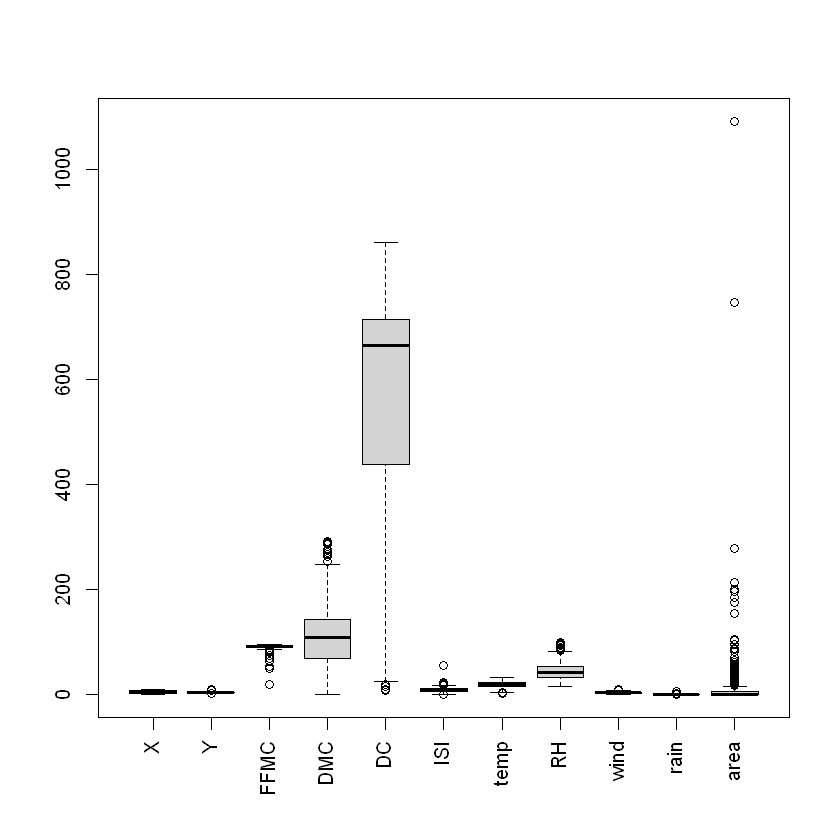

In [7]:
#Let us plot a boxplot
boxplot(forest1, las=3, cex.axis = 1)

This suffice our purpose but plotting all boxplot with same scale is not a good idea.Let's plot the boxplots individually.

No id variables; using all as measure variables



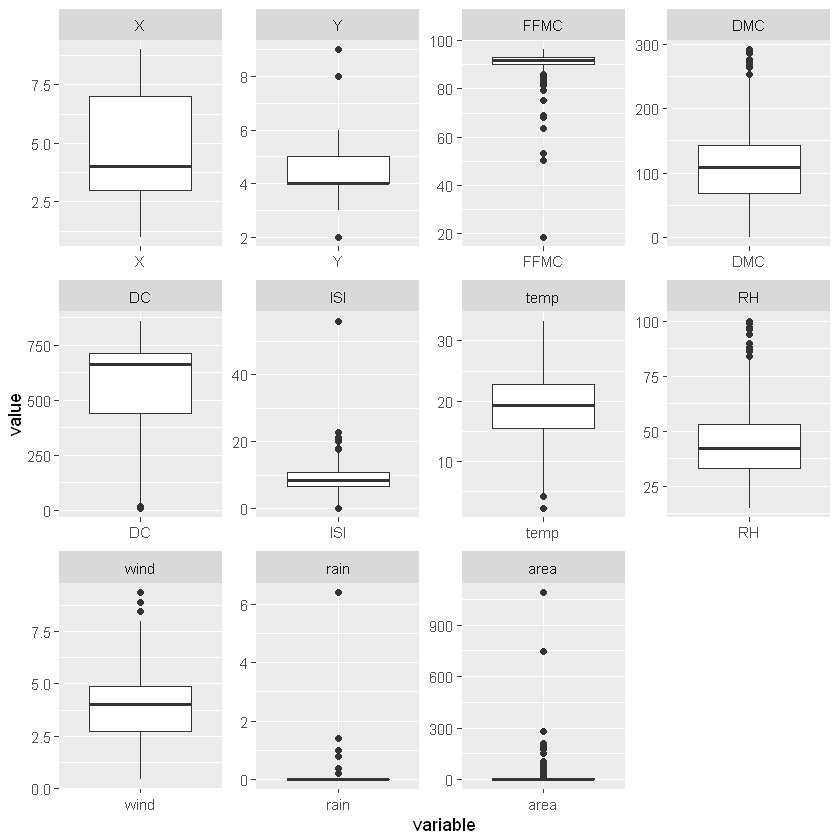

In [8]:
# Generate box plots of all variables except the two categorical/nomimal ones
m1=melt(forest1)
ggplot(m1,aes(x = variable,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

We can see that there are outliers present in FFMC,DMC,ISI and RH

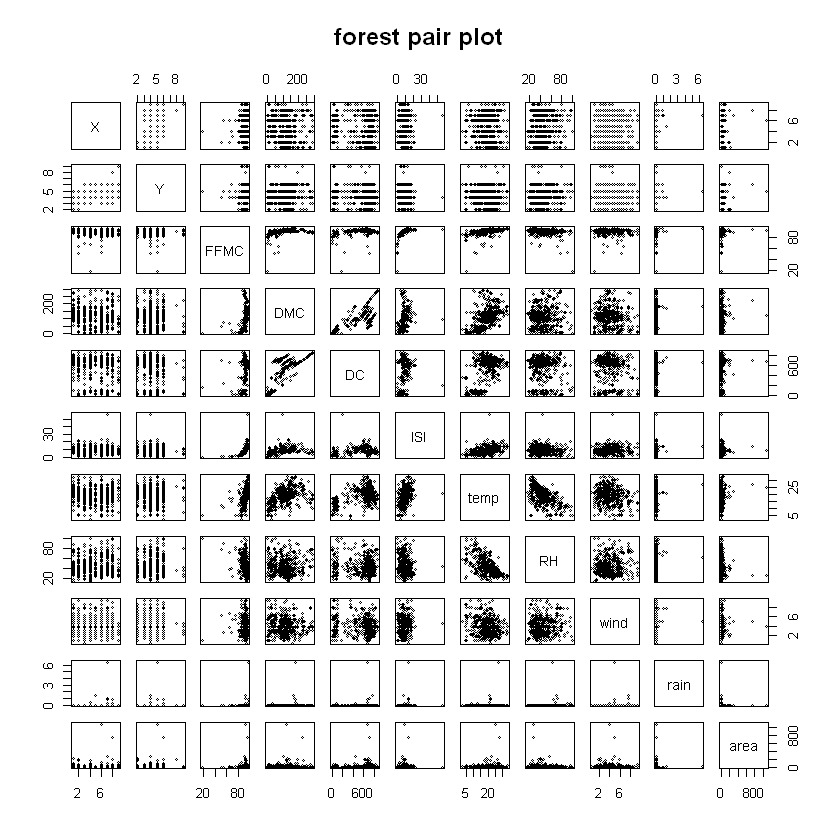

In [9]:
#options(repr.plot.width=50, repr.plot.height=50)
pairs(forest1,cex=0.5,main = "forest pair plot")

In [10]:
#find the correlation between different parameters
cor(forest1)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000000,0.539548171,-0.02103927,-0.048384178,-0.08591612,0.006209941,-0.05125826,0.08522319,0.01879782,0.065387168,0.063385299
Y,0.539548171,1.000000000,-0.04630755,0.007781561,-0.10117777,-0.024487992,-0.02410308,0.06222073,-0.02034085,0.033234103,0.044873225
FFMC,-0.021039272,-0.046307546,1.00000000,0.382618800,0.33051180,0.531804931,0.43153226,-0.30099542,-0.02848481,0.056701533,0.040122004
DMC,-0.048384178,0.007781561,0.38261880,1.000000000,0.68219161,0.305127835,0.46959384,0.07379494,-0.10534225,0.074789982,0.072994296
DC,-0.085916123,-0.101177767,0.33051180,0.682191612,1.00000000,0.229154169,0.49620805,-0.03919165,-0.20346569,0.035860862,0.049383225
ISI,0.006209941,-0.024487992,0.53180493,0.305127835,0.22915417,1.000000000,0.39428710,-0.13251718,0.10682589,0.067668190,0.008257688
temp,-0.051258262,-0.024103084,0.43153226,0.469593844,0.49620805,0.394287104,1.00000000,-0.52739034,-0.22711622,0.069490547,0.097844107
RH,0.085223194,0.062220731,-0.30099542,0.073794941,-0.03919165,-0.132517177,-0.52739034,1.00000000,0.06941007,0.099751223,-0.075518563
wind,0.018797818,-0.020340852,-0.02848481,-0.105342253,-0.20346569,0.106825888,-0.22711622,0.06941007,1.00000000,0.061118880,0.012317277
rain,0.065387168,0.033234103,0.05670153,0.074789982,0.03586086,0.067668190,0.06949055,0.09975122,0.06111888,1.000000000,-0.007365729


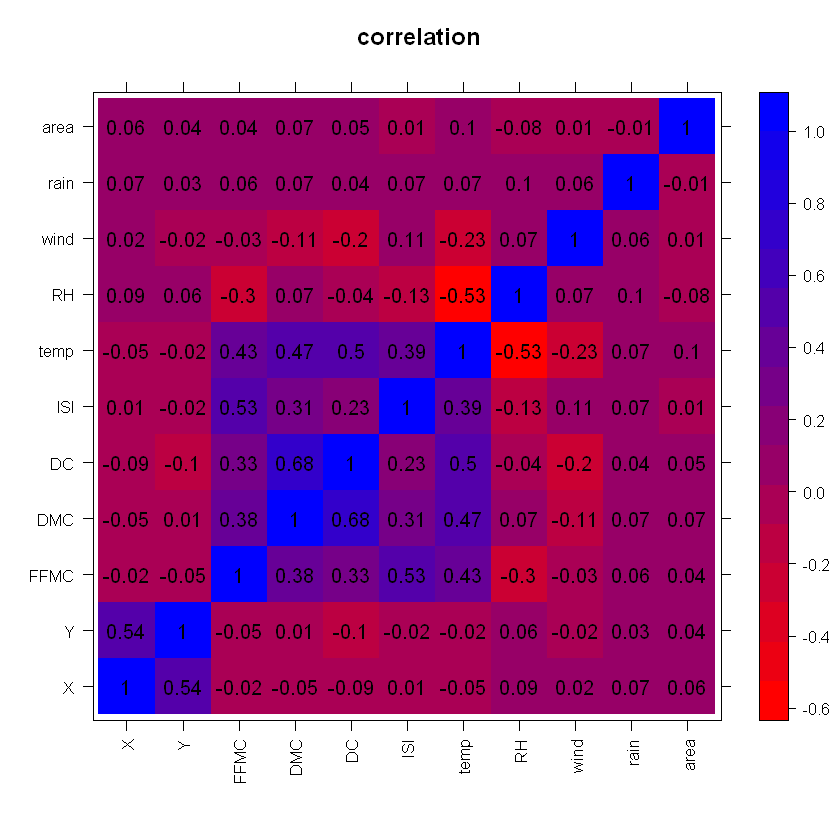

In [11]:
#Define you own panel
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}
#Define the color scheme
cols = colorRampPalette(c("red","blue"))
#Plot the correlation matrix.
levelplot(cor(forest1), col.regions = cols(100), main = "correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

<p><ol><li>As we can see from the above plot, the correlation between DC and DMC is high.
<p><li>The correlation between RH and temp is also evident.
<p><li> Temp has the highest positive correlation with area followed by DMC.
<p><li>RH and rain have negative correlation with area

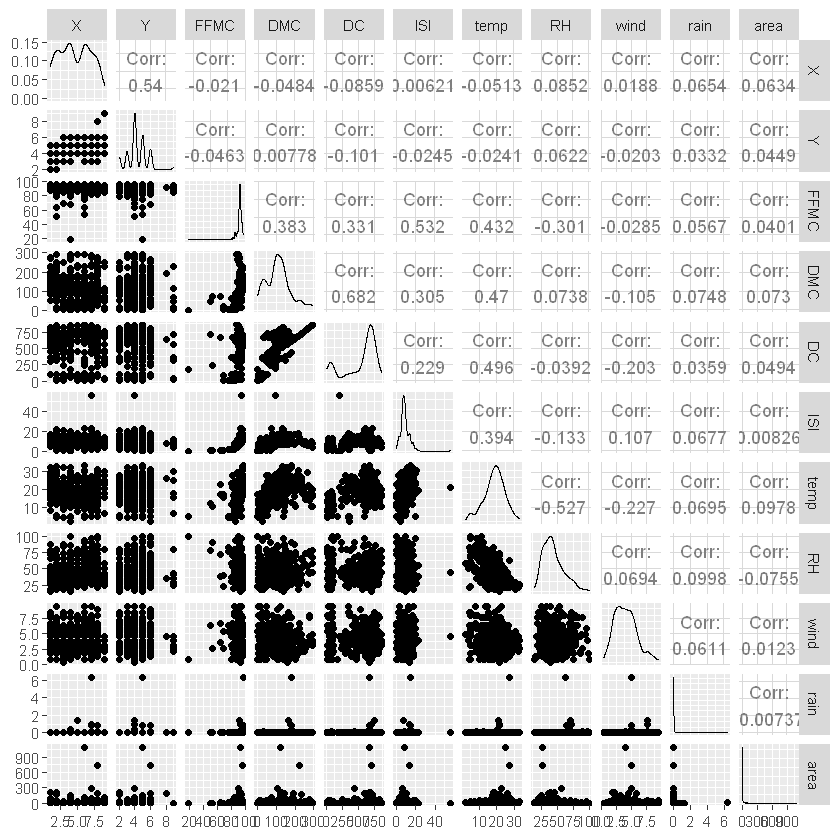

In [12]:
#Make a matrix of plots with a given data set
ggpairs(forest1)

We can confirm that temp has a correlation value of 0.0978 with burned area.

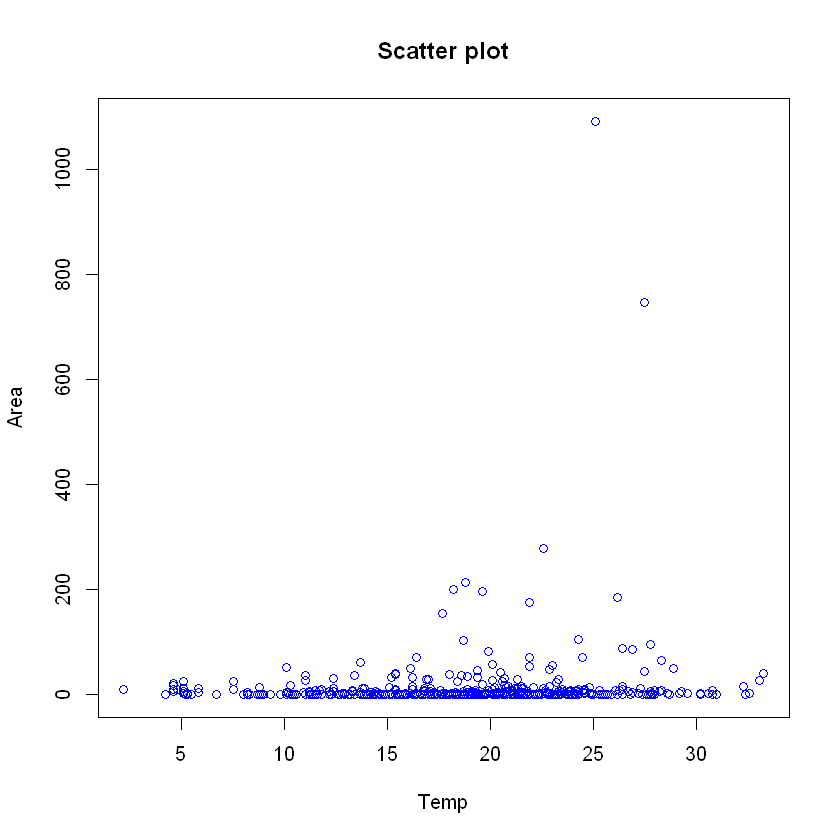

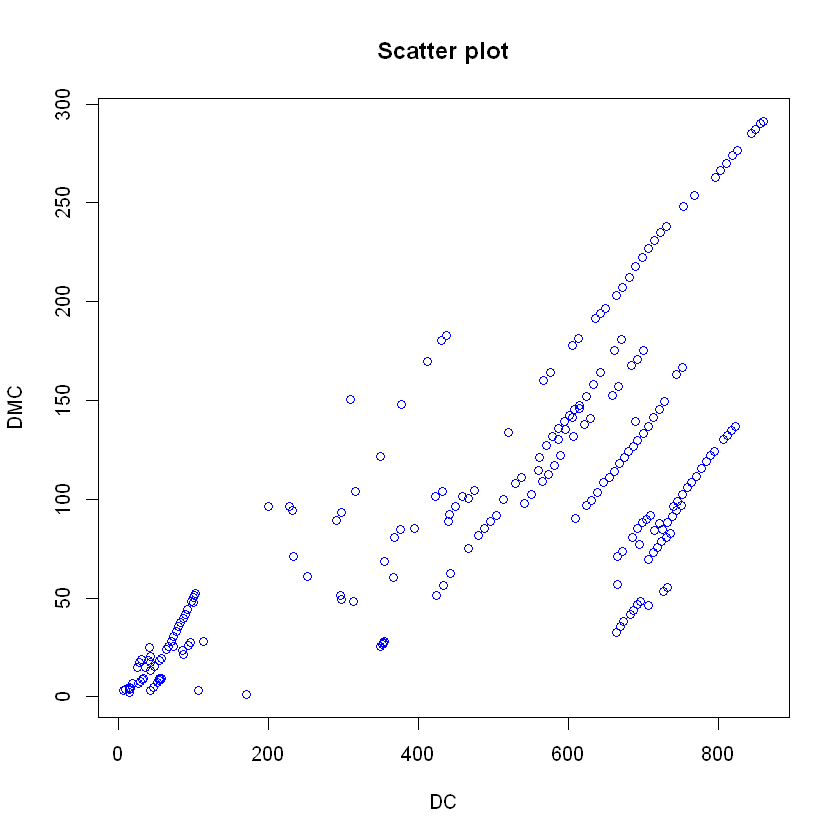

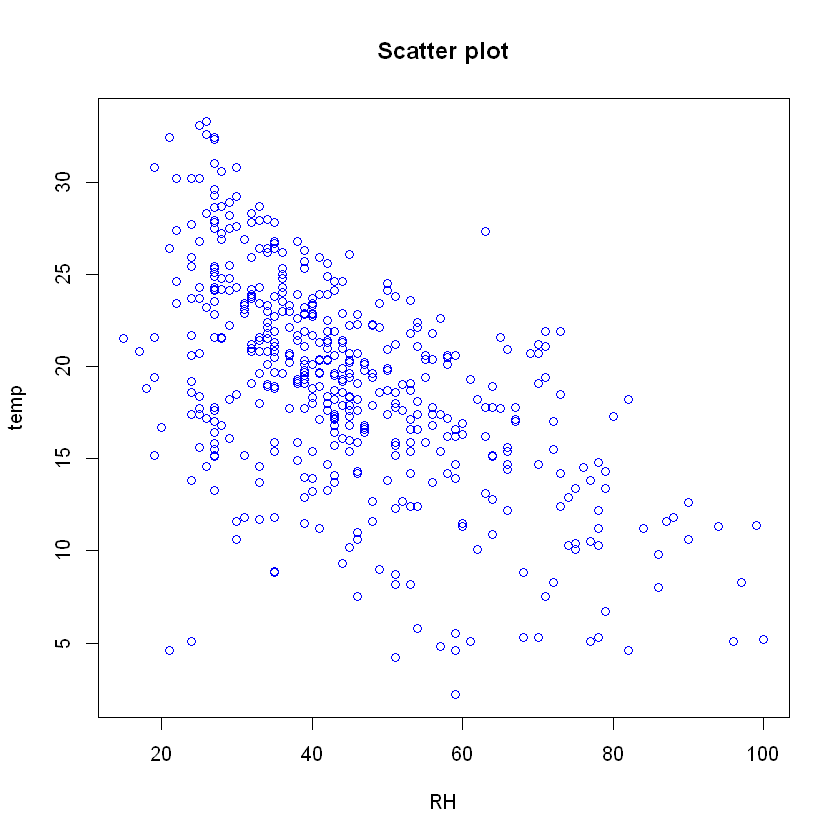

In [13]:
#let's plot scatter plots and have a closer look at them
#par(mfrow=c(1,3))

plot(forest1$temp, forest1$area, col = "blue", main='Scatter plot', ylab='Area', xlab='Temp')
plot(forest1$DC,forest1$DMC,col = "blue", main='Scatter plot', ylab='DMC', xlab='DC')
plot(forest1$RH,forest1$temp,col = "blue", main='Scatter plot', ylab='temp', xlab='RH')

We can say that as DC increases DMC increases and vice versa,and temp increases as RH decreases.

## 3. Model Development<a class="anchor" id="sec_3"></a>

In [14]:
#Let's divide the dataset into training and testing set
set.seed(456)
forest$logarea <- ifelse(forest$area > 0, log(forest$area), 0)
forest$area=NULL
forest$month=NULL                                                    #we will not be using month,make it null
forest$day=NULL                                                      #we will not be using day,make it null
train_ind = sample(seq_len(nrow(forest)),size = floor(0.8*nrow(forest)))
train=forest[train_ind,]
test=forest[-train_ind,]
train1=forest1[train_ind,]
test1=forest1[-train_ind,]

### Model-1 - Linear Regression

In [15]:
#Let's first build the linear regression model
fit1 = lm(area~., data =train1 )
summary(fit1)


Call:
lm(formula = area ~ ., data = train1)

Residuals:
   Min     1Q Median     3Q    Max 
-32.81 -12.59  -6.59   1.47 713.39 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 15.103764  48.599467   0.311   0.7561  
X            1.219179   1.083686   1.125   0.2612  
Y            0.676986   2.079106   0.326   0.7449  
FFMC        -0.187840   0.510416  -0.368   0.7131  
DMC          0.107734   0.050699   2.125   0.0342 *
DC          -0.008462   0.012543  -0.675   0.5003  
ISI         -0.288904   0.704303  -0.410   0.6819  
temp         0.329577   0.602108   0.547   0.5844  
RH          -0.266962   0.182396  -1.464   0.1441  
wind         1.202717   1.282543   0.938   0.3489  
rain        -2.083548   6.592492  -0.316   0.7521  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42.97 on 402 degrees of freedom
Multiple R-squared:  0.034,	Adjusted R-squared:  0.009972 
F-statistic: 1.415 on 10 and 402 DF,  p-value: 0

We see that we can't actually select any features based on p value, no p-value is less than 0.01,let's perform few more operations.Instead of manually selecting a subset of variables that are strongly associated with the predictor, R provides some automatic approaches of variable selection by using step() function.

In [16]:
#let's fit the model to our test dataset
RMSE(predict(fit1,test1),test1$area)

[1] 112.2564

RMSE is very high if we are trying to do it normally, so let us take log transormations on the area column and build our model

In [17]:
fit1 = lm(logarea~., data =train )
summary(fit1)


Call:
lm(formula = logarea ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5228 -1.0015 -0.5989  0.8720  5.1610 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.0169323  1.6029656   0.634   0.5262  
X            0.0309189  0.0357434   0.865   0.3875  
Y            0.0430305  0.0685756   0.627   0.5307  
FFMC        -0.0024888  0.0168352  -0.148   0.8825  
DMC          0.0017418  0.0016722   1.042   0.2982  
DC           0.0003642  0.0004137   0.880   0.3792  
ISI         -0.0309294  0.0232302  -1.331   0.1838  
temp        -0.0059839  0.0198594  -0.301   0.7633  
RH          -0.0121602  0.0060160  -2.021   0.0439 *
wind         0.0915525  0.0423024   2.164   0.0310 *
rain         0.1465245  0.2174414   0.674   0.5008  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.417 on 402 degrees of freedom
Multiple R-squared:  0.03446,	Adjusted R-squared:  0.01044 
F-statistic: 1.435 on 1

In [18]:
#let's apply stepwise regression
step1 <- step(fit1)

Start:  AIC=298.93
logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + 
    rain

       Df Sum of Sq    RSS    AIC
- FFMC  1    0.0439 807.57 296.95
- temp  1    0.1824 807.71 297.02
- Y     1    0.7909 808.32 297.33
- rain  1    0.9122 808.44 297.40
- X     1    1.5031 809.03 297.70
- DC    1    1.5565 809.09 297.73
- DMC   1    2.1794 809.71 298.04
- ISI   1    3.5610 811.09 298.75
<none>              807.53 298.93
- RH    1    8.2073 815.74 301.11
- wind  1    9.4090 816.94 301.71

Step:  AIC=296.95
logarea ~ X + Y + DMC + DC + ISI + temp + RH + wind + rain

       Df Sum of Sq    RSS    AIC
- temp  1    0.1730 807.75 295.04
- Y     1    0.8044 808.38 295.36
- rain  1    0.8935 808.47 295.41
- X     1    1.4932 809.07 295.71
- DC    1    1.5290 809.10 295.73
- DMC   1    2.1405 809.71 296.05
<none>              807.57 296.95
- ISI   1    4.9219 812.50 297.46
- RH    1    8.5853 816.16 299.32
- wind  1    9.4296 817.00 299.75

Step:  AIC=295.04
logarea ~ X + Y + DMC + DC + 

As shown above, the best model is selected based on AIC after 6 steps. The best model has DMC and RH and X and ISI and wind as predictors.

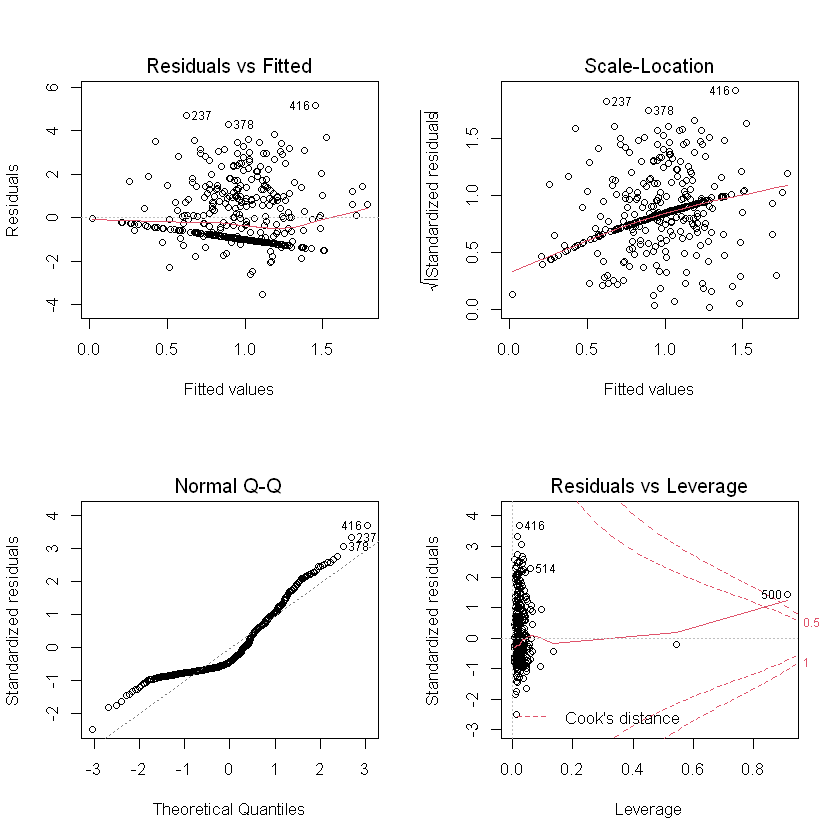

In [19]:
#let's explore the plots
par(mfcol=c(2,2))
plot(fit1)

In [20]:
RMSE(predict(fit1,test),test$logarea)           # RMSE for the first model built

[1] 1.512325

In [21]:
#let's update the initial model
fit2 = update(fit1, . ~ . + wind:RH: DMC:ISI:X)
summary(fit2)


Call:
lm(formula = logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + 
    RH + wind + rain + X:DMC:ISI:RH:wind, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4128 -0.9917 -0.5883  0.8657  5.2812 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)        2.196e-01  1.632e+00   0.135  0.89304   
X                  7.122e-02  3.969e-02   1.795  0.07348 . 
Y                  5.361e-02  6.837e-02   0.784  0.43345   
FFMC              -2.322e-03  1.675e-02  -0.139  0.88978   
DMC                3.495e-03  1.832e-03   1.908  0.05711 . 
DC                 3.372e-04  4.117e-04   0.819  0.41327   
ISI               -1.114e-02  2.468e-02  -0.452  0.65181   
temp              -6.214e-03  1.976e-02  -0.315  0.75329   
RH                -7.421e-03  6.333e-03  -1.172  0.24202   
wind               1.362e-01  4.640e-02   2.936  0.00351 **
rain               2.881e-01  2.250e-01   1.280  0.20115   
X:DMC:ISI:RH:wind -2.173e-07  9.505e-08  -2.2

In [22]:
#let's update the initial model
fit2 = update(fit1, . ~ . + X:RH: DMC)
summary(fit2)


Call:
lm(formula = logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + 
    RH + wind + rain + X:DMC:RH, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5453 -0.9733 -0.5884  0.8303  4.9505 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -9.569e-02  1.644e+00  -0.058  0.95361   
X            1.300e-01  5.121e-02   2.538  0.01151 * 
Y            4.431e-02  6.805e-02   0.651  0.51538   
FFMC         2.353e-03  1.680e-02   0.140  0.88870   
DMC          6.452e-03  2.416e-03   2.670  0.00788 **
DC           3.372e-04  4.107e-04   0.821  0.41208   
ISI         -3.356e-02  2.307e-02  -1.454  0.14660   
temp        -1.564e-02  2.003e-02  -0.781  0.43532   
RH          -4.999e-03  6.540e-03  -0.764  0.44514   
wind         9.052e-02  4.198e-02   2.156  0.03166 * 
rain         2.324e-01  2.181e-01   1.065  0.28730   
X:DMC:RH    -1.771e-05  6.604e-06  -2.682  0.00761 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resi

In [23]:
#Let's update the second model with RH and DMC
fit3 = update(fit2, . ~ . + wind)
summary(fit3)


Call:
lm(formula = logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + 
    RH + wind + rain + X:DMC:RH, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5453 -0.9733 -0.5884  0.8303  4.9505 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -9.569e-02  1.644e+00  -0.058  0.95361   
X            1.300e-01  5.121e-02   2.538  0.01151 * 
Y            4.431e-02  6.805e-02   0.651  0.51538   
FFMC         2.353e-03  1.680e-02   0.140  0.88870   
DMC          6.452e-03  2.416e-03   2.670  0.00788 **
DC           3.372e-04  4.107e-04   0.821  0.41208   
ISI         -3.356e-02  2.307e-02  -1.454  0.14660   
temp        -1.564e-02  2.003e-02  -0.781  0.43532   
RH          -4.999e-03  6.540e-03  -0.764  0.44514   
wind         9.052e-02  4.198e-02   2.156  0.03166 * 
rain         2.324e-01  2.181e-01   1.065  0.28730   
X:DMC:RH    -1.771e-05  6.604e-06  -2.682  0.00761 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resi

In [24]:
#Let's update the initial model with X:DMC
fit4 = update(fit3, . ~ . + X: DMC)
summary(fit4)


Call:
lm(formula = logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + 
    RH + wind + rain + X:DMC + X:DMC:RH, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5432 -0.9715 -0.5897  0.8320  4.9779 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -8.173e-02  1.652e+00  -0.049   0.9606  
X            1.344e-01  6.794e-02   1.979   0.0485 *
Y            4.481e-02  6.832e-02   0.656   0.5123  
FFMC         2.088e-03  1.703e-02   0.123   0.9025  
DMC          6.616e-03  2.925e-03   2.262   0.0242 *
DC           3.355e-04  4.115e-04   0.815   0.4154  
ISI         -3.337e-02  2.318e-02  -1.439   0.1509  
temp        -1.544e-02  2.017e-02  -0.766   0.4444  
RH          -5.349e-03  7.438e-03  -0.719   0.4724  
wind         9.013e-02  4.222e-02   2.135   0.0334 *
rain         2.313e-01  2.187e-01   1.058   0.2908  
X:DMC       -6.734e-05  6.775e-04  -0.099   0.9209  
X:DMC:RH    -1.703e-05  9.560e-06  -1.781   0.0756 .
---
Signif. codes:  0 '*

In [25]:
#Let's update the initial model4 with X:RH
fit5 = update(fit4, . ~ . -FFMC-Y-DC-rain )
summary(fit5)


Call:
lm(formula = logarea ~ X + DMC + ISI + temp + RH + wind + X:DMC + 
    X:DMC:RH, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6012 -0.9855 -0.5774  0.8457  4.9690 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.051e-01  5.972e-01   0.343  0.73145   
X            1.446e-01  6.594e-02   2.193  0.02885 * 
DMC          7.243e-03  2.711e-03   2.672  0.00785 **
ISI         -3.222e-02  2.052e-02  -1.570  0.11711   
temp        -8.531e-03  1.925e-02  -0.443  0.65791   
RH          -4.824e-03  6.949e-03  -0.694  0.48796   
wind         8.860e-02  4.160e-02   2.130  0.03378 * 
X:DMC       -1.141e-04  6.632e-04  -0.172  0.86345   
X:DMC:RH    -1.551e-05  9.254e-06  -1.676  0.09454 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.405 on 404 degrees of freedom
Multiple R-squared:  0.04663,	Adjusted R-squared:  0.02775 
F-statistic:  2.47 on 8 and 404 DF,  p-value: 0.0127


fit5 looks better to me as F-statisitc is high,residual standard error is less.

In [26]:
confint(fit5, level = 0.95)

,2.5 %,97.5 %
(Intercept),-9.688582e-01,1.379041e+00
X,1.499832e-02,2.742422e-01
DMC,1.913212e-03,1.257181e-02
ISI,-7.255851e-02,8.114454e-03
temp,-4.637504e-02,2.931384e-02
RH,-1.848599e-02,8.837343e-03
wind,6.824813e-03,1.703733e-01
X:DMC,-1.417976e-03,1.189690e-03
X:DMC:RH,-3.369897e-05,2.683315e-06


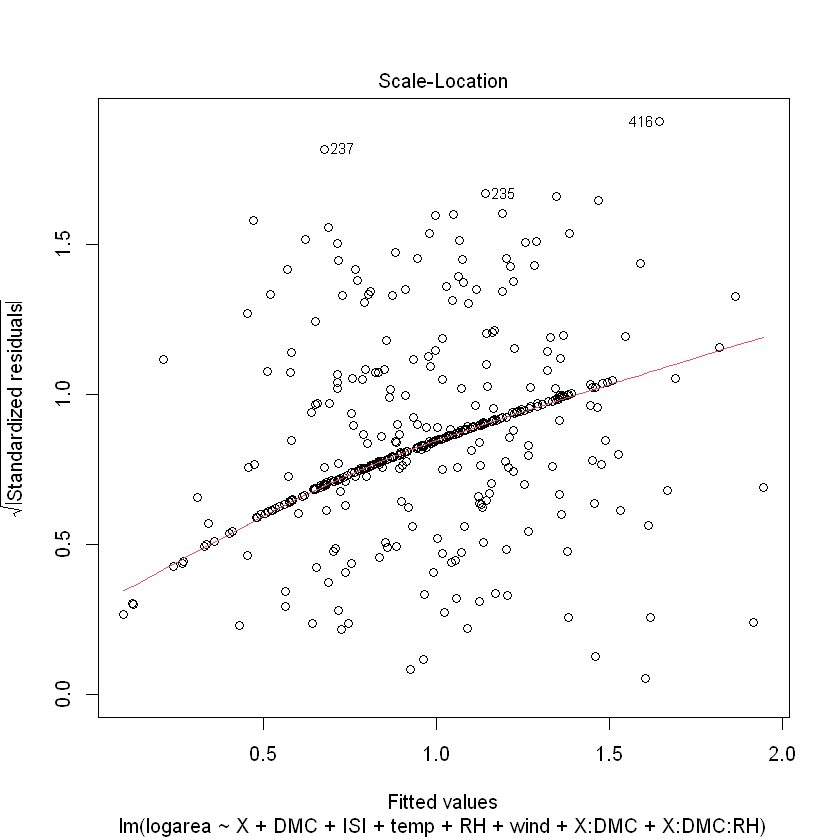

In [27]:
#let's have a closer look at the plot of fit4 to observe the deviation of all points
plot(fit5, which = 3)

In [28]:
#let's perform the outlierTest and find out if any points are outliers 
library(car)
outlierTest(fit5, cutoff=0.05, digits = 1)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferroni p
416 3.714224         0.00023256     0.096048

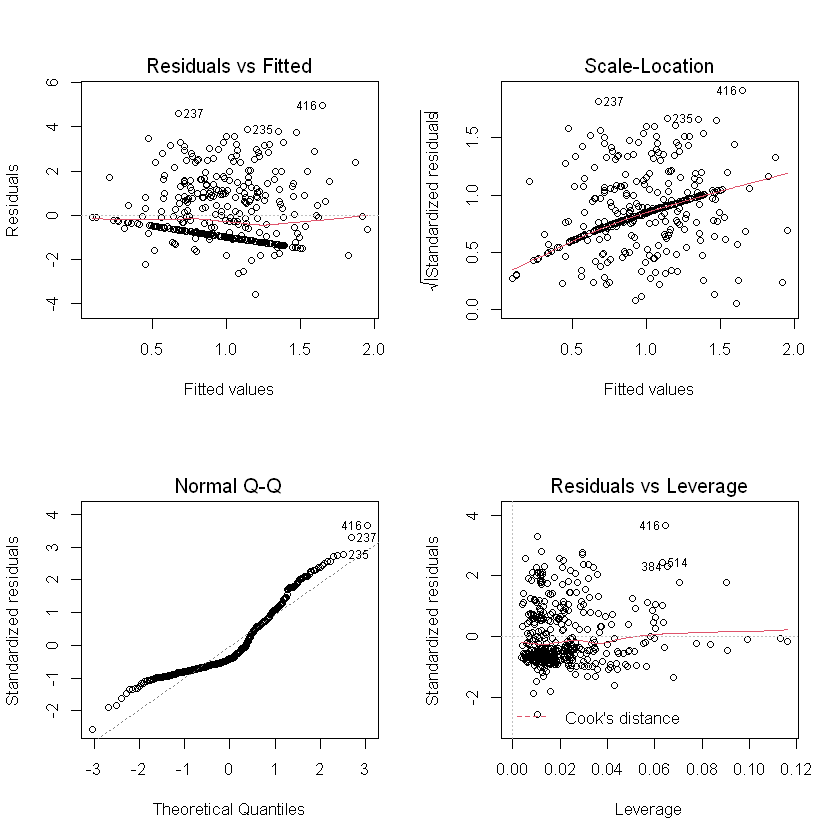

In [29]:
par(mfcol=c(2,2))
plot(fit5)

Warning message in plot.window(...):
""id.method" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"
Warning message in box(...):
""id.method" is not a graphical parameter"
Warning message in title(...):
""id.method" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"


,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
514,2.44458080,0.06311925,4.419034e-02
237,3.35220499,0.01028726,1.265731e-02
423,-0.05786302,0.11295145,4.748723e-05
449,-0.18124702,0.11592862,4.797815e-04
416,3.71422429,0.06443917,1.023364e-01


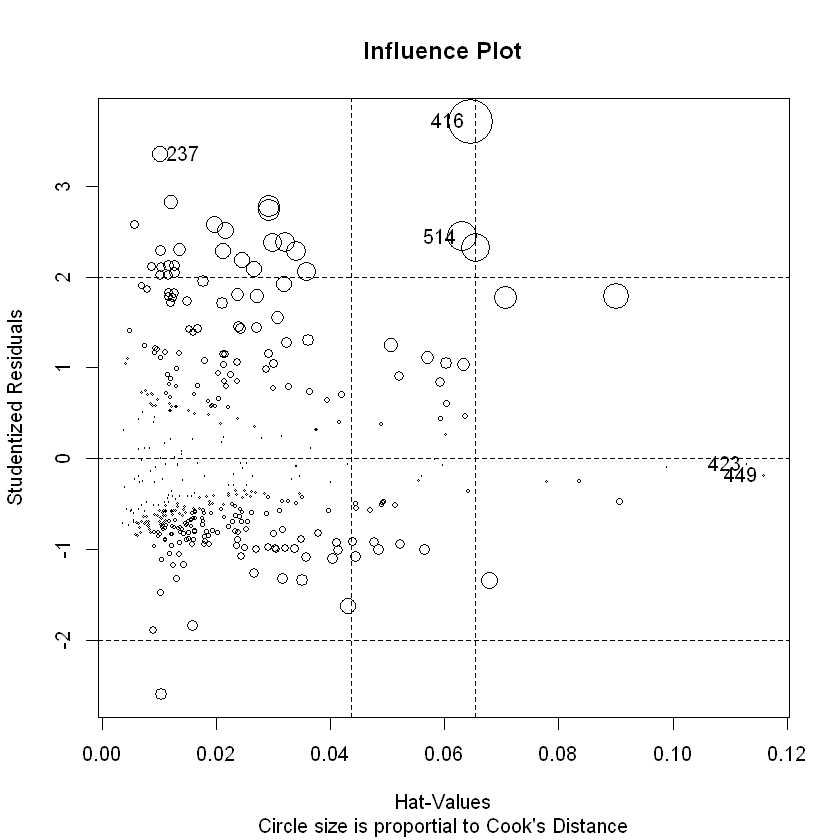

In [30]:
#let's plot influence plot to get to know the points which are influencing our data points
influencePlot(fit5, scale=5, id.method="noteworthy", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

<p>Vertical reference lines are drawn at twice and three times the average hat value, horizontal reference lines at -2, 0, and 2 on the Studentized-residual scale.</p>

In [31]:
#lets find the index of points which are outliers from the train dataset
for (i in c(514,237,423,449,416)){
    print(which(train_ind==i))
}

[1] 122
[1] 130
[1] 157
[1] 273
[1] 288


As we can see, indexes 58,130,288,224,151 have influence points,let's remove them

In [32]:
train_nout=train[-c(122,130,157,273,288),]
dim(train_nout)  #we have removed the outliers

[1] 408  11

In [33]:
#Let's first build the linear regression model
newfit1 = lm(logarea~., data = train_nout)
summary(newfit1)



Call:
lm(formula = logarea ~ ., data = train_nout)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4565 -0.9671 -0.6213  0.8935  4.3101 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.0969912  1.5566081   0.705   0.4814  
X            0.0331758  0.0349435   0.949   0.3430  
Y            0.0449509  0.0668175   0.673   0.5015  
FFMC        -0.0017480  0.0163325  -0.107   0.9148  
DMC          0.0018406  0.0016716   1.101   0.2715  
DC           0.0003533  0.0004017   0.880   0.3797  
ISI         -0.0269018  0.0227077  -1.185   0.2368  
temp        -0.0144797  0.0196716  -0.736   0.4621  
RH          -0.0133032  0.0059141  -2.249   0.0250 *
wind         0.0849368  0.0413180   2.056   0.0405 *
rain         0.1661922  0.2105962   0.789   0.4305  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.372 on 397 degrees of freedom
Multiple R-squared:  0.03482,	Adjusted R-squared:  0.0105 
F-statistic: 1.432 

In [34]:
#let's build the step of our built model and find the influencing parameters
step_n1=step(newfit1)

Start:  AIC=268.9
logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + 
    rain

       Df Sum of Sq    RSS    AIC
- FFMC  1    0.0216 747.27 266.91
- Y     1    0.8519 748.11 267.36
- temp  1    1.0198 748.27 267.45
- rain  1    1.1722 748.43 267.54
- DC    1    1.4560 748.71 267.69
- X     1    1.6966 748.95 267.82
- DMC   1    2.2820 749.54 268.14
- ISI   1    2.6418 749.89 268.34
<none>              747.25 268.90
- wind  1    7.9541 755.21 271.22
- RH    1    9.5238 756.78 272.06

Step:  AIC=266.91
logarea ~ X + Y + DMC + DC + ISI + temp + RH + wind + rain

       Df Sum of Sq    RSS    AIC
- Y     1    0.8617 748.14 265.38
- temp  1    1.0066 748.28 265.46
- rain  1    1.1589 748.43 265.54
- DC    1    1.4395 748.71 265.69
- X     1    1.6875 748.96 265.83
- DMC   1    2.2832 749.56 266.15
- ISI   1    3.5482 750.82 266.84
<none>              747.27 266.91
- wind  1    7.9636 755.24 269.23
- RH    1   10.1068 757.38 270.39

Step:  AIC=265.38
logarea ~ X + DMC + DC + ISI +

I have tried building models with interactions ISI:DMC:RH and ISI:DMC and ISI:RH without removing wind,X,Y,rain but each fit gave a model having less F-statistic,less R-squared,less Adjusted R-squared but the below combination gave good results compared to the previous one.

In [35]:
#add the updation step
newfit2 = update(newfit1, . ~ . + DMC:RH+X-Y+wind-rain-FFMC-temp-DC)
summary(newfit2)


Call:
lm(formula = logarea ~ X + DMC + ISI + RH + wind + DMC:RH, data = train_nout)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5921 -0.9563 -0.6102  0.8809  4.1267 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  4.472e-01  4.703e-01   0.951   0.3422  
X            4.542e-02  2.946e-02   1.542   0.1240  
DMC          6.125e-03  3.378e-03   1.813   0.0705 .
ISI         -3.397e-02  1.930e-02  -1.760   0.0792 .
RH          -2.784e-03  7.669e-03  -0.363   0.7168  
wind         9.794e-02  4.038e-02   2.425   0.0157 *
DMC:RH      -7.529e-05  6.228e-05  -1.209   0.2274  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.366 on 401 degrees of freedom
Multiple R-squared:  0.03379,	Adjusted R-squared:  0.01933 
F-statistic: 2.337 on 6 and 401 DF,  p-value: 0.03135


In [36]:
#let's predict our values for the test dataset
pred1=predict(newfit2,test)


In [37]:
library(MLmetrics)
#Let's print MAE
MAE(pred1,test$logarea)

[1] 1.169541

In [38]:
#let's print RMSE
sqrt(mean((pred1-test$logarea)^2))

[1] 1.506393

In [39]:
# Define training control
train.control <- trainControl(method = "LOOCV")
# Train the model
model <- train(logarea ~., data = train_nout, method = "lm",
               trControl = train.control)
# Summarize the results
print(model)

Linear Regression 

408 samples
 10 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 407, 407, 407, 407, 407, 407, ... 
Resampling results:

  RMSE      Rsquared      MAE     
  1.420335  1.053648e-05  1.154258

Tuning parameter 'intercept' was held constant at a value of TRUE


In [40]:
RMSE(predict(model,test),test$logarea)                     #print RMSE of LOOCV model

[1] 1.511807

In [41]:
MAE(predict(model,test),test$logarea)                      #print MAE of LOOCV model

[1] 1.170209

We have done LOOCV cross validation, and the results are same as before model without LOOCV, Thus, it didn't show that much effect. Lets try K-fold cross validation

In [42]:
#K fold cross validation
train.cont <- trainControl(method = "cv",number=10)
# Train the model
kfmodel <- train(logarea ~., data = train_nout, method = "lm",
               trControl = train.cont)
# Summarize the results
print(kfmodel)

Linear Regression 

408 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 367, 367, 367, 367, 366, 368, ... 
Resampling results:

  RMSE      Rsquared    MAE     
  1.412543  0.01399661  1.156816

Tuning parameter 'intercept' was held constant at a value of TRUE


In [43]:
RMSE(predict(kfmodel,test),test$logarea)                      #print RMSE of 10-fold cv model           

[1] 1.511807

In [44]:
MAE(predict(kfmodel,test),test$logarea)                        #print MAE of 10-fold cv model 

[1] 1.170209

The 10 fold cross-validation also gave similar results as that of LOOCV.

### Model 2 - Random Forest

In [45]:
#K fold cross validation
#using dataset as train_out which was prepared earlier,it does not have month,day columns and outliers are removed
train.cont <- trainControl(method = "cv",number=10)
# Train the model
rfmodel <- train(logarea ~., data = train_nout, method = "rf",
               trControl = train.cont)
# Summarize the results
print(rfmodel)

Random Forest 

408 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 367, 367, 367, 366, 367, 367, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared    MAE     
   2    1.396624  0.03129679  1.150150
   6    1.411124  0.03156698  1.161853
  10    1.413619  0.03091239  1.163065

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 2.


In [46]:
rfmodel$finalModel                                       #print the final rf model


Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 2.000337
                    % Var explained: -5.42

In [47]:
RMSE(predict(rfmodel,test),test$logarea)                    #print the RMSE of random forest predictions

[1] 1.543847

In [48]:
MAE(predict(rfmodel,test),test$logarea)                     #print the MAE of random forest predictions

[1] 1.200304

In [49]:
#K fold cross validation
#second model for random forest,it has data has train data which has all attributes.
train.cont <- trainControl(method = "cv",number=10)
# Train the model
rfmodel1 <- train(logarea ~., data = train, method = "rf",
               trControl = train.cont)
# Summarize the results
print(rfmodel1)

Random Forest 

413 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 371, 371, 371, 373, 372, 372, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared     MAE     
   2    1.451652  0.007771501  1.178311
   6    1.452675  0.013408032  1.180584
  10    1.464719  0.011779983  1.190762

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 2.


In [50]:
RMSE(predict(rfmodel1,test),test$logarea)                      #print the RMSE of random forest model 1

[1] 1.547091

In [51]:
MAE(predict(rfmodel1,test),test$logarea)                       #print the MAE of random forest model 1

[1] 1.21137

We can see from above metrics that rfmodel is better than rfmodel1 as it has less MAE and R-squared.That may be because we have removed the outliers

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

By comparing linear regression and Random forest models we can observe that
<p>RMSE for RandomForest-1.54|---------------------------------|RMSE for Linear Regression-1.51
<p>MAE for RandomForest-1.20|----------------------------------|RMSE for Linear Regression-1.17
    
<p> The ultimate goal of any Machine Learning model is that we should have very less error, be it RMSE,MAE or MSE. So here,we got good values for Linear Regression compared to RandomForest. Though the difference between them(RMSE's and MAE's of 2 models) is not so high, Linear Regression is better than Random Forest. </p>

<p> We have performed K fold cross-validation with 10 folds and LOOCV techniques but the results were not that different with without using these methods.

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

<li> We have checked building our model with area as given in the dataset,and results were not satisfying.So log transformation is done for area column.It has drastically improved our results


<p><li>Variable selection was made using step wise selection using linear regression, In statistics, stepwise regression is a method of fitting regression models in which the choice of predictive variables is carried out by an automatic procedure. In each step, a variable is considered for addition to or subtraction from the set of explanatory variables based on some prespecified criterion. Usually, this takes the form of a sequence of F-tests or t-tests, but other techniques are possible, such as adjusted R2, Akaike information criterion, Bayesian information criterion, Mallows's Cp, PRESS, or false discovery rate.
<ol><li> We have used a backward stepsize regression method where we started with all paramters initially and deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically insignificant loss of fit. Thus we were left with X,ISI,DMC,wind and RH at the end.
<li> Then later, we added interactions like +X:ISI or -DC-rain etc for updating our model and making it better so that we would have a least Residual standard error,higher Multiple R-squared,	Adjusted R-squared and F-statistic.
    </ol>
<li> Even though we have 13 attributes in our dataset, all were not contributing for better prediction of burned area


## 6. Conclusion <a class="anchor" id="sec_6"></a>

Let's visit the question which were asked before we did this analysis
<p><b>Can we accurately predict the burned area of a bushfire given the collected data?</b></p>
<p>I feel we can only predict the burned area upto some extent correctly, but fully not develop a robust model which can accurately predict the burned area of forestfires. The reason for this is that the correlation values are very less for 'area' attribute with other attributes and moreover there were high negative correlation between RH and temp which was effecting the model.
<p> We have found that DMC,RH,wind,ISI,X are playing an important role in predicting the burned area.</p>
<p> We only have 517 rows of data which is less for building a good model,we need thousands of rows of data for building a complex model which has less bias and varience.

## 7. References <a class="anchor" id="sec_7"></a>

<p>https://www.rdocumentation.org/packages/GGally/versions/1.5.0/topics/ggpairs-  ggpairs</p>
http://www.sthda.com/english/articles/38-regression-model-validation/157-cross-validation-essentials-in-r/#loading-required-r-packages- cross validation
https://en.wikipedia.org/wiki/Stepwise_regression -stepwise regression
https://www.rdocumentation.org/packages/caret/versions/4.47/topics/train - train